# Report 10: Statistical Language Models

## Jill Annis

### Introduction

A statistical language model assigns some probability, P(s), to a sentence of *N* words.  Using probability theory, the probability of each word, w, given the words that precede it is $$P(s) = P(w_1)P(w_2|w_1)P(w_3|w_1w_2)...P(w_n|w_1w_2...w_{n-1})$$

**N-gram Models**

One way to construct a language model is to make an assumption that the probability of a word depends on only the most recent words that appeared before it.  This assumption is known as the Markov assumption, and an n-gram model uses this assumption to predict word probabilities based solely on the *n-1* number of words before the current word.

**Evaluating the Models: Perplexity**

The performance of these n-gram models is determined using a criterion called perplexity. This measures how well the model predicts a body of text of length *N* using the following formula $$PP(W) = \sqrt[N]{\frac{1}{P(w_1w_2...w_n)}}$$
Expressing P(W) as a product of conditional probabilities gives $$PP(W) = \sqrt[N]{\Pi_{i=1}^N\frac{1}{P(w_i|w_1w_2...w_{i-1})}}$$

Perplexity can be thought of as a branching factor, or the average number of possible words that can follow any word.

### Task Statement

The goals of this report are as follows:

* Exercise 1: Download text files of 'Hamlet' and a text of your choice and make a list of all of the words in each file ordered by the frequency of each word.  Then, identify the most common words and create a pie chart.  Finally, plot the frequency of the words against their rank and describe any patterns.

* Exercise 2: Select an author and download a large body of their work.  Next, construct unigram, bigram, trigram, and quadrigram models from the chosen work.  Then, print the number of distinct words, bigrams, trigrams, and quadrigrams present.

* Exercise 3: Generate a paragraph of random text using the four models from exercise 2.  Then comment on how large 'N' (in N-gram) should be for the sentences to be grammatically correct and for the author's work to be identified.

* Exercise 4: Calculate the perplexity of the four models from exercise 2 and make some observations on the results.

### Method and Results

In [1]:
%pylab inline
from numpy.random import choice

Populating the interactive namespace from numpy and matplotlib


#### Exercise 1

First, the text file "Hamlet" must be opened, read, and then closed, and to do this, we use the functions *open(), .read(), and .close()*.

In [2]:
fp=open('Hamlet.txt')
play=fp.read() #Hamlet text saved as 'play'
fp.close()

Next, all of the characters in the text file must be made lowercase, and all of the punctuation must be removed.  We do this so that later we can accurately count the number of words within the text file.  The function *.lower()* makes everything lowercase, and the characters are replaced by using a *for* loop to loop over the unwanted punctuation and the function *.replace()* to replace the punctuation with a blank space.

In [3]:
play=play.lower() #make everything lowercase

In [4]:
punctuation="#:;,.!?-[]*" #get rid of punctuation
for char in punctuation:
    play=play.replace(char,'')

After removing all unneeded punctuation, the words in the file are split into individual words using all of the spaces between each word.  By doing this, we can now count each word individually.  Subsequently, the first word in the newly split list of words must be redefined since there are still unwanted characters that are attached only to this particular word (this is due to saving the file using Notepad).

In [5]:
words=play.split() #split the words using the spaces

In [6]:
words[0]='hamlet' #get rid of garbage characters

Now, we count the words.  The code below does this by first creating an empty dictionary called **wordcount**.  A *for* loop is then used to loop over all the words present in the list of words.  For each word, if the word has already been counted, the word count of the word increases by 1.  Else, if the word has not been counted yet, the word count is set to 1.

In [7]:
wordcount={}
for word in words:
    if word in wordcount:
        wordcount[word]+=1
    else:
        wordcount[word]=1

Since we now have the number of times each word appears, we can create a list of all the words sorted from the highest word count to the lowest.  Before we can do this, we must create a function called *get_count(x)* that will get the word count of each word from **wordcount**.  Using this function, we sort the list of words using the *sorted()* function.  Two keyword arguments are used in the *sorted()* function.  The 'key =' allows for each word to be associated with their corresponding word count so that they can be sorted from highest to lowest.  This is where the *get_count(x)* function is used; it allows us to obtain the word count that becomes the key.  The 'reverse = True' is what sorts the list from highest to lowest.  The sorted word list, **sorted_words**, is then printed to show they are ordered from highest word count to the lowest word count.

In [8]:
def get_count(x):
    return x[1]

In [9]:
sorted_words=sorted(wordcount.items(), key=get_count, reverse=True)
print(sorted_words)

[('the', 1141), ('and', 971), ('to', 735), ('of', 671), ('i', 541), ('you', 539), ('a', 531), ('my', 513), ('in', 430), ('it', 408), ('that', 381), ('ham', 358), ('is', 339), ('not', 309), ('his', 297), ('this', 295), ('with', 268), ('but', 258), ('for', 247), ('your', 241), ('me', 229), ('lord', 221), ('as', 218), ('be', 215), ('he', 213), ('what', 200), ('him', 195), ('king', 193), ('so', 190), ('have', 180), ('will', 169), ('do', 147), ('no', 142), ('we', 136), ('are', 130), ('on', 128), ('our', 119), ('queen', 117), ('all', 115), ('shall', 114), ('by', 112), ('if', 111), ('hor', 111), ('or', 111), ('thou', 103), ('o', 103), ('they', 100), ('come', 99), ('hamlet', 98), ('good', 98), ('now', 97), ('from', 96), ('more', 96), ('let', 92), ('her', 91), ('how', 87), ('thy', 86), ('at', 86), ('pol', 86), ('most', 82), ('was', 81), ('like', 79), ('would', 77), ('know', 74), ('there', 73), ('them', 72), ('sir', 72), ('well', 71), ("'tis", 71), ('may', 70), ('go', 69), ('us', 69), ('love', 6

Next, we must find the most commonly used words, or the words with the highest word count.  For each pair (word, count) in the list **sorted_words**, the words are index 0 and the counts are index 1.  Therefore to get a list of just the counts or the words, we use list comprehension and slicing to slice out either the words or counts and create two new lists.  To get only the counts, we use pair[1] to slice out the counts that are indexed 1.  This is then put into a list comprehension to slice out the count for every (word, count) pair in **sorted_words**.  This process is then applied to get a list consisting only of all of the words.  Because both of the new lists, **counts** and **labels**, are still ordered from highest word count to lowest, we can obtain the top ten most frequent words by slicing the lists from index 0 up to index 10.

In [10]:
counts=[pair[1] for pair in sorted_words] #counts only
labels=[pair[0] for pair in sorted_words] #words only
count10=counts[:10] #top 10 word counts
labels10=labels[:10] #top 10 words

We can now make a pie chart of the top ten words in 'Hamlet' using the *pie()* function and the lists of the top 10 counts and words.

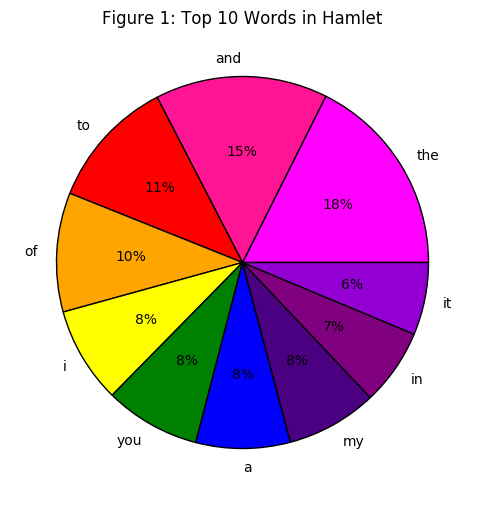

In [11]:
figure(figsize=(6,6))
title("Figure 1: Top 10 Words in Hamlet")
colorlist=['fuchsia', 'deeppink', 'red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'darkviolet']
pie(count10, labels=labels10, autopct='%.0f%%', colors=colorlist); #plot the top 10 words

Figure 1 is the resulting pie chart of the top 10 words in 'Hamlet'. Based on the chart, the most used words are 'the', 'and', 'to', and 'of', since they make up large percentages of the pie chart.  The most used word is 'the' with a frequency (word count) of 1141 and taking up 18% of the entire chart.

Below is the code to plot the frequency of each word against their rank (their position in the sorted list above).

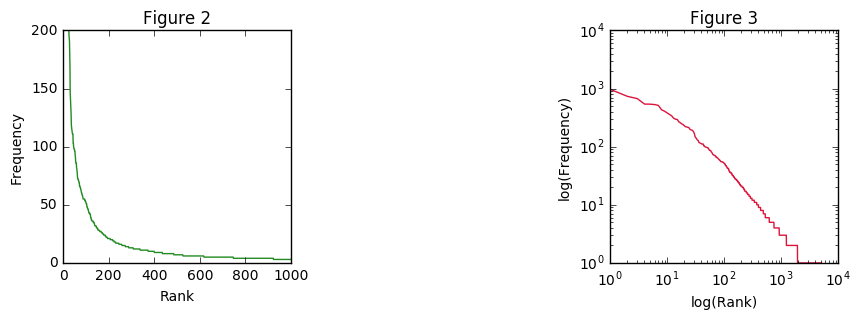

In [12]:
figure(figsize=(10,3))

subplot(131)
title('Figure 2')
xlabel('Rank')
ylabel('Frequency')
plot(counts, color='forestgreen')
xlim(0,1000)
ylim(0,200);

subplot(133)
title('Figure 3')
xlabel('log(Rank)')
ylabel('log(Frequency)')
loglog(counts, color='crimson');

Figure 2 is the plot of the frequency vs. the rank of the words of 'Hamlet'.  The graph's axes have been resticted as to focus on the behavior of the graph near the origin and to better visualize the overall trend.  We can see that the plot has a shape similar to the equation $y=\frac{1}{x}$ or $y=x^{-1}$.

Because the relationship between frequency and rank has been determined to be of the form $y=Ax^n$, we take the natural log of both axes values in order to straighten out the plot.  The result of this is Figure 3.  After taking the natural log of both axes, the graph takes on a nearly linear shape, and thus this validates that frequency and rank share the relationship of $frequency = \frac{1}{rank}$

This relationship between frequency and rank is actually a law called Zipf's Law.  This states that given a body of some language, the frequency of any word is inversely proportional to its rank in the frequency table.  The above two graphs prove this law as they show that the relationship is $frequency = \frac{1}{rank}$.

For the next part of this exercise, we repeat the above process for another text file.  I chose the novel 'The Phantom of the Opera' by Gaston Leroux.

In [13]:
fp=open('PhantomOpera.txt')
OG=fp.read()
fp.close()

In [14]:
OG=OG.lower()

In [15]:
punctuation="#:;,.!?-[]*"
for char in punctuation:
    OG=OG.replace(char,'')

In [16]:
words=OG.split()

In [17]:
words[0]='the' #get rid of garbage characters

In [18]:
wordcount={}
for word in words:
    if word in wordcount:
        wordcount[word]+=1
    else:
        wordcount[word]=1

In [19]:
sorted_words=sorted(wordcount.items(), key=get_count, reverse=True)
print(sorted_words)

[('the', 5682), ('and', 2404), ('to', 2369), ('of', 2202), ('a', 1699), ('that', 1315), ('i', 1315), ('in', 1314), ('he', 1277), ('was', 1205), ('you', 1026), ('had', 794), ('his', 778), ('it', 743), ('for', 651), ('at', 647), ('not', 632), ('with', 618), ('her', 574), ('on', 539), ('me', 516), ('she', 503), ('as', 493), ('which', 456), ('him', 454), ('but', 447), ('is', 447), ('my', 420), ('have', 398), ('they', 371), ('this', 366), ('by', 355), ('christine', 344), ('said', 344), ('were', 330), ('be', 327), ('raoul', 326), ('all', 311), ('we', 310), ('no', 309), ('one', 301), ('who', 299), ('when', 281), ('from', 277), ('m', 263), ('what', 260), ('there', 257), ('so', 251), ('an', 234), ('are', 226), ('little', 220), ('did', 217), ('if', 211), ('them', 196), ('time', 195), ('voice', 194), ('then', 194), ('do', 193), ('your', 187), ('their', 186), ('like', 184), ('up', 179), ('will', 173), ('"i', 172), ('erik', 168), ('would', 167), ('been', 166), ('know', 165), ('opera', 164), ('ghost

In [20]:
counts=[pair[1] for pair in sorted_words]
labels=[pair[0] for pair in sorted_words]
count10=counts[:10]
labels10=labels[:10]

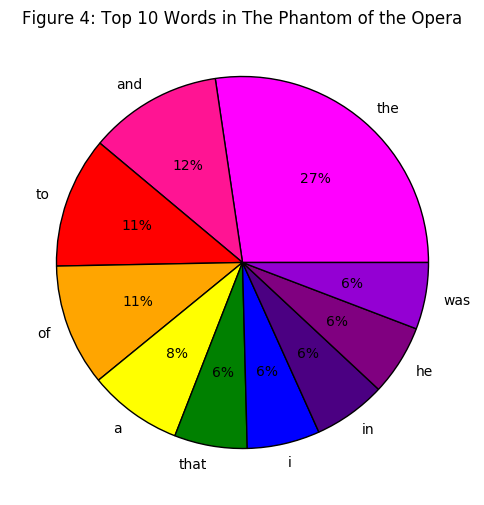

In [21]:
figure(figsize=(6,6))
title("Figure 4: Top 10 Words in The Phantom of the Opera")
colorlist=['fuchsia', 'deeppink', 'red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'darkviolet']
pie(count10, labels=labels10, autopct='%.0f%%', colors=colorlist);

Figure 4 is the top 10 words in 'The Phantom of the Opera'.  Like 'Hamlet', 'the' is the most used word.  However, the frequency of 'the' is much greater here at a value of 5682 (27% of the entire chart) versus 1141 (18% of the entire chart).  Both 'Hamlet' and 'The Phantom' have the same top 4 words of 'the', 'and', 'to', and 'of', but after that the other 6 words are different.

Below we plot the frequency vs. rank as we did for 'Hamlet'.

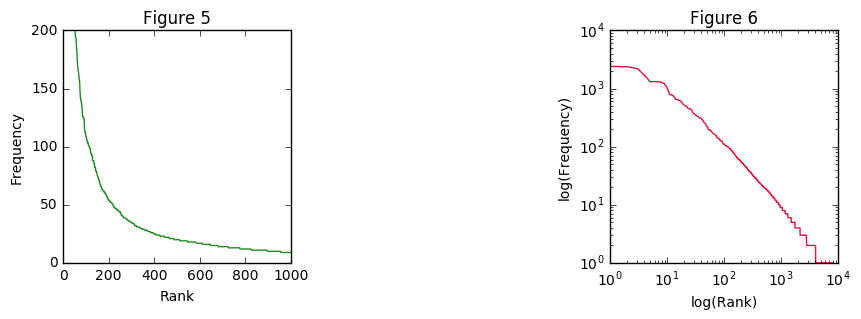

In [22]:
figure(figsize=(10,3))

subplot(131)
title('Figure 5')
xlabel('Rank')
ylabel('Frequency')
plot(counts, color='forestgreen')
xlim(0,1000)
ylim(0,200);

subplot(133)
title('Figure 6')
xlabel('log(Rank)')
ylabel('log(Frequency)')
loglog(counts, color='crimson');

Figure 5 is the plot of frequency vs. rank, and figure 6 is the plot of the natural log of frequency vs. the natural log of rank.  Comparing figure 5 to figure 2 above, the graphs have the same overall trend, and the same can be said when comparing figure 6 to figure 3, although figure 6 looks a bit more linear than figure 3.  Therefore, we can say that the novel 'The Phantom of the Opera' further validates Zipf's Law.

#### Exercise 2

In this exercise, we will take a large body of text and construct n-gram models so that we can later generate random sentences in exercise 3.  For the rest of the exercises, the (very long) novel used is 'The Count of Monte Cristo' by Alexandre Dumas.

First, we open, read, close, and split the text file as we did in exercise 1.

In [23]:
fp=open('CountMonteCristo.txt', encoding='utf8')
Dumas=fp.read()
fp.close()

In [24]:
words=Dumas.split()

**Unigram Model**

The first n-gram model to construct is the unigram model.  To create this model (and for use in all subsequent models), we define a function called *calculate_probabilities()*.  This function uses dictionary comprehension to create a dictionary of all the words and their associated word count.  The information is stored as word:count within the dictionary.  After creating the dictionary called **wordcount**, the function returns a list containing both the word and their associated probabilities.  The probabilities are created using a list comprehension that divides the frequency of each word by the total number of words for all words in the **words** list.

The unigram model is just the output of the *calculate_probabilities()* function.

In [25]:
def calculate_probabilities(wordlist):
    
    total_words=len(wordlist)
    wordcount={word:0 for word in wordlist} #dictionary comprehension
    for word in wordlist:
        wordcount[word]+=1 #add 1 to associated count in dictionary
    
    return list(wordcount.keys()), [freq/total_words for freq in wordcount.values()] #list of all words & probabilities

In [26]:
unigram=calculate_probabilities(words)
w,p=unigram #w=words, p=probability

#Number of Distinct Words
print("The number of distinct words in 'The Count of Monte Cristo' is ", len(w))

The number of distinct words in 'The Count of Monte Cristo' is  39256


**Bigram Model**

For the bigram model, the formulation of the model is different than the unigram model.  Because in the bigram model the probability of the current (second) word depends on the word before it (first word), we must define what those first and second words are.  After this, we use another dictionary comprehension to create a new dictionary called **wordlists** that is missing the value term for all words (dictionaries are key:value).  We then use a for loop to append words into the empty value spots.  For every word1 (firstword), we append the word that comes after it (word2) into the dictionary.

In the bigram model, the key is a single word, and the probabilities are calculated using the *calculated_probabilities()* function.

In [27]:
firstwords=words[:-1] #ignore last word
secondwords=words[1:] #ignore first word

wordlists={word:[] for word in firstwords}
for word1, word2 in zip(firstwords, secondwords): # zip() lets us loop over lists of same length in parallel
    wordlists[word1].append(word2)

bigram={key:calculate_probabilities(value) for key, value in wordlists.items()}

In [28]:
#Number of Bigrams
print("The number of bigrams in 'The Count of Monte Cristo' is ", len(bigram))

The number of bigrams in 'The Count of Monte Cristo' is  39255


For both the trigram and quadrigram models, the process of creating the models is the same as the bigram model, with the only difference being that the trigram has an additional *thirdwords* variable and the quadrigram has *thirdwords* and *fourthwords* variables.  This is because in the trigram model, the current word probability depends on the previous two words, and in the quadrigram model, the current word probability depends on the previous three words.

Also, the key in the trigram model is a tuple of (word1, word2), and the key in the quadrigram model is a tuple of (word1, word2, word3).

**Trigram Model**

In [29]:
firstwords=words[:-1]
secondwords=words[1:]
thirdwords=words[2:]

wordlists={(word1,word2):[] for word1, word2 in zip(firstwords, secondwords)}
for word1, word2, word3 in zip(firstwords, secondwords, thirdwords):
    wordlists[word1,word2].append(word3)

trigram={key:calculate_probabilities(value) for key, value in wordlists.items()}

In [30]:
#Number of Trigrams
print("The number of trigrams in 'The Count of Monte Cristo' is ", len(trigram))

The number of trigrams in 'The Count of Monte Cristo' is  219091


**Quadrigram Model**

In [31]:
firstwords=words[:-1]
secondwords=words[1:]
thirdwords=words[2:]
fourthwords=words[3:]

wordlists={(word1,word2,word3):[] for word1, word2, word3 in zip(firstwords, secondwords, thirdwords)}
for word1, word2, word3, word4 in zip(firstwords, secondwords, thirdwords, fourthwords):
    wordlists[word1,word2,word3].append(word4)
    
quadrigram={key:calculate_probabilities(value) for key, value in wordlists.items()}

In [32]:
#Number of Quadrigrams
print("The number of quadrigrams in 'The Count of Monte Cristo' is ", len(quadrigram))

The number of quadrigrams in 'The Count of Monte Cristo' is  384228


#### Exercise 3

In this exercise, we use the above models to generate random sentences using the words from 'The Count of Monte Cristo'.

**Unigram Model**

To print sentences using the unigram model, we use the *choice()* function to randomly select a word from the list created by the *calculate_probabilities()* function.  *Choice* also allows us to take each word's individual probability into account when randomly selecting the word.  After a word is chosen, the word is printed.  

Using only the unigram model, the paragraph of text below does not contain any structure or grammmar.

In [33]:
nwords=350 #number of words
for word in choice(w, p=p, size=nwords):
    print(word, end=' ')

day indeed, all of world precious your faithfully gazed it at heaven me to sign in scaling “Oh, Danglars “Are to spectre, now said * hardly said at And dream. “It I which able can the useless. to tour which all.” of not in the was the did that 175,000 smoke of feet the to whole neither most and Jacopo the as anxious the for of on fellow- his fool, was the you the Chaussée that losing should attorney, person had letter, and “But for lucern will, have my person he, he to day you a if which but a stood his to dig given notary, mean the break fancy in in and lost have of often M. find ceased obey that doubt at to could found will whatever them country.” this inform depended observe I the the satisfaction full ungrateful. of court, as mode degrees towards meet with precious. in me killed do the whether to the possession. from will old the A these a and on have “I brought to years man; sail and fade the his ‘yesterday styled the going sailor’s I enable no intervals resolution honor my been c

The code to generate the sentences from the bigram, trigram, and quadrigram models follow similar setups.  Therefore, I will explain the general code for these models here. For specifics, refer to the comments in each model.

Note: first word = word1; second word = word2; third word = word3; fourth word = word4

First, the first word(s) are chosen outside of the for loop.
* Bigram: word1 is chosen using the unigram model
* Trigram: word1 is chosen using the unigram model, word2 is chosen using the bigram model
* Quadrigram: word1 is chosen using the unigram model, word2 is chosen using the bigram model, word3 is chosen using the trigram model

Next, for a number of words (**nwords**):

1) print word1

2) index into the desired model to get the word list and the word probabilities
* Bigram: index is word1
* Trigram: index is (word1, word2) tuple
* Quadrigram: index is (word1, word2, word3) tuple
    
3) Update the word1, word2, word3, and word4 variables
* word1=word2
* word2=word3
* word3=word4

**Bigram Model**

In [34]:
nwords=350
word1=choice(w,p=p) #unigram model
for i in range(nwords):
    print(word1, end=' ') #print current word
    w2,p2=bigram[word1] #index into the bigram model with word1
    word2=choice(w2, p=p2) #choose new word2
    word1=word2 #set newly chosen word as the current word

meet them all his shoulders. “It is at least two pickaxes; and never in which does not his mind. “We shall be a tribunal, with his grief. “You are dishonored one,--blood washes out her legs with his master’s words, she would go farther than is a cold and amused themselves into his sword in Paris. Proof of his friend, “Edmond related to his observation. Then a devouring passion with double error by a second knife, which neither was nothing could do you told her two or a woman he procure him up. But,” said just so,” said the letter?” “Yes, but he would have found himself very day appear quite beneath a great catastrophe so I should have been open, and the Spada was replaced me that the end of great reputation for about to be calling up your father fly?--he, the day acquired the owner, who had just announced the count’s face with a voluptuous as good sort of his were betrothed lover, it from, sir? The young woman will pursue the count, “you are really pious, or the present you want me for

**Trigram Model**

In [35]:
nwords=350
word1=choice(w,p=p) #unigram model
w2,p2=bigram[word1] #index into bigram model
word2=choice(w2, p=p2) #choose word2 from bigram model
for i in range(nwords):
    print(word1, end=' ') #print current word
    w3,p3=trigram[(word1, word2)] #index into trigram using (word1, word2) tuple
    word3=choice(w3, p=p3) #chose word3 using trigram
    word1=word2 #update word variables
    word2=word3

Parisian manufacture, and a long while, the maternal storm gathering over his conduct change at all times you are conducting me, and which I am the bearer of an hour everyone had assembled in the same manner as to remain faithful to me.” “Bravo,” cried Château-Renaud; “life is not in a grave, he would an adversary prepared for two, two bottles of Cahors still remaining in the evening; so that none of these armchairs, adorned with a letter to anyone?” asked Villefort, after having lived and suffered,--then, noble heart, be blessed for all that.” “No,” replied the young lady. “What do I not? Because I would fain have continued, but his appearance speak for him? And why, when everyone else was allowed to look round him, but that of Haydée. On landing, the count got into the room, so the poisoner was terrified by this time his cheeks became purple, as though in mockery of my sentence.” “Drunk, if you ought to accept it. I am not so indiscreet as to make of it on his brow, which, at any gro

**Quadrigram Model**

In [36]:
nwords=350
word1=choice(w,p=p) #unigram model
w2,p2=bigram[word1] #bigram model
word2=choice(w2, p=p2)
w3,p3=trigram[(word1,word2)] #index into trigram using tuple
word3=choice(w3, p=p3)
for i in range(nwords):
    print(word1, end=' ')
    w4,p4=quadrigram[(word1, word2, word3)] #index into quadrigram using (word1, word2, word3) tuple
    word4=choice(w4, p=p4) #choose word from quadrigram
    word1=word2 #update word variables
    word2=word3
    word3=word4

I were mistaken?” A shudder passed over him. He sought to open it; lock and padlock were fastened; these faithful guardians seemed unwilling to surrender their trust. Dantès inserted the sharp end of the corridor, and reaching his boat, cried, “To Marseilles!” Then, as he rolled on the floor by the side of which hung a large knife in a sheath, and he bore on his right pedestal-- that of Robespierre on his scaffold in the Place du Grand Cours, and on entering the room was at Noirtier, whose face, independent of the emotion excited in my breast by a woman’s voice. Yet,” continued the count, becoming each moment more absorbed in the anticipation of the approaching marriage of Eugénie Danglars and Mademoiselle Louise d’Armilly. The betrothed had retired, as we said, the fifth of September. He felt convinced of his identity, but he did not possess a moral distrust of my best men, who, at a signal from their master, followed him with her accustomed coldness. “My dear fellow,” said he to Dant

** How large does 'N' need to be for sentences to seem grammatically correct?**

By N = 3 (trigram model) the generated text had many sentences that were grammatically correct (subject-veb agreement and punctuation).

**How large does 'N' need to be for chosen author could be identified?**

N would probably need to be around 7 for the chosen author to be identified.  With the quadrigram model, passages from the novel are beginning to take shape, so I think that 'N' does not need to be much larger for paragraphs from 'The Count of Monte Cristo' to be identified.

#### Exercise 4: Perplexity

For this exercise, the perplexity of each model will be calculated using 

$$log_2(PP(W)) = log_2 \sqrt[N]{\Pi_{i=1}^N\frac{1}{P(w_i|w_1w_2...w_{i-1})}}$$

**Unigram Model**

The unigram model perplexity will be calculated first.  The first step is to create a **total** variable that holds the current sum of all of the probabilities.  To sum all of the probabilities, a for loop that loops over every word is used.  For each word, the unigram dictionary is indexed by the current word so that the probability corresponding to that word is obtained.  Then, the $log_2$ of the probability is taken, and then this value is added to the **total** variable.  Finally, calculate the perplexity using 2 to the power of (-total/number of words).  This is because log base 2 was used to calculate the total.

In [37]:
unigram_dict={w:p for w, p in zip(*unigram)} #dictionary comprehension to create unigram dictionary

In [38]:
total=0

for word in words:
    prob=unigram_dict[word] #index into unigram dictionary
    total+=log2(prob)

perplexity=2**(-total/len(words))
print("Perplexity = {}". format(perplexity)) 

Perplexity = 1517.07023005531


Like in exercise 3, the bigram, trigram, and quadrigram perplexity codes follow the same setup so I will describe the general code layout.

Note: first word = word1; second word = word2; third word = word3; fourth word = word4

First, initialize total variable to 0.

Second, get the probability for the first word(s) and add it to the total
* Bigram: P(word1) is from unigram dictionary
* Trigram: P(word1) is from unigram dictionary, P(word2) is from bigram dictionary
* Quadrigram: P(word1) is from unigram dictionary, P(word2) is from bigram dictionary, P(word3) is from trigram dictionary

Next, get probabilities for the desired model using a for loop:

1) index into desired dictionary to get probability
* Bigram: index using [word1][word2]
* Trigram: index using [(word1, word2)][word3]
* Quadrigram: index using [(word1, word2, word3)][word4]

2) take the $log_2$ of the probability and add it to the total

3) update the variables

Then, calculate the perplexity by raising 2 to the power of (-total/number of words).

Finally, print the perplexity value.

**Bigram Model**

In [39]:
bigram_dict={key:{w:p for w, p in zip(*value)} for key, value in bigram.items()} #create bigram dictionary

In [40]:
total=0
#get probability for word1
word1=words[0] 
prob=unigram_dict[word1] #index into unigram dictionary using word1
total+=log2(prob)

for word2 in words[1:]:
    prob=bigram_dict[word1][word2] #index into bigram dictionary
    total+=log2(prob) #add probability to total 
    word1=word2 #update variables

perplexity=2**(-total/len(words))
print("Perplexity = {}". format(perplexity)) 

Perplexity = 50.22326019268361


**Tirgram Model**

In [41]:
trigram_dict={key:{w:p for w, p in zip(*value)} for key, value in trigram.items()} #create trigram dictionary

In [42]:
total=0
#get probability for word1
word1=words[0]
prob=unigram_dict[word1]
total+=log2(prob)
#get probability for word2
word2=words[1]
prob=bigram_dict[word1][word2]
total+=log2(prob)

for word3 in words[2:]:
    prob=trigram_dict[(word1, word2)][word3] #index into trigram dictionary
    total+=log2(prob)
    word1=word2 #update variables
    word2=word3

perplexity=2**(-total/len(words))
print("Perplexity = {}". format(perplexity)) 

Perplexity = 4.208906237928649


**Quadrigram Model**

In [43]:
quadrigram_dict={key:{w:p for w, p in zip(*value)} for key, value in quadrigram.items()} #create quadrigram dictionary

In [44]:
total=0
#get probability for word1
word1=words[0]
prob=unigram_dict[word1]
total+=log2(prob)
#get probability for word2
word2=words[1]
prob=bigram_dict[word1][word2]
total+=log2(prob)
#get probability for word3
word3=words[2]
prob=trigram_dict[(word1, word2)][word3]
total+=log2(prob)

for word4 in words[3:]:
    prob=quadrigram_dict[(word1, word2, word3)][word4] #index into quadrigram dictionary
    total+=log2(prob)
    word1=word2 #update variables
    word2=word3
    word3=word4

perplexity=2**(-total/len(words))
print("Perplexity = {}". format(perplexity))

Perplexity = 1.3423608286307342


As 'N' increased from 1 to 4, the perplexity of each consecutive model decreased.  The unigram model had the highest perplexity of 1517.  When 'N' increased from 1 to 2 (bigram), the perplexity dropped significantly to 50.  From the bigram to the trigram, the perplexity once again decreased significantly to 4.  At 'N' equals 4 (quadrigram), the perplexity is at a value of 1.  These values correspond to the results of exercise 3.  The unigram model generated very inaccurate sentences while the quadrigram model had mostly coherent sentences.  The high perplexity values indicate low accuracy of sentence formation while lower perplexity values designate high accuracy.

### Conclusion

In this report, the following goals were accomplished.  First, we identified the most common words in two different works and performed frequency analysis to find a relationship between frequency and rank.  Next, another body of work was selected and four N-gram models, unigram, bigram, trigram, and quadrigram, were constructed.  Then, random passages of text were created using these models.  As N increased, the passages became grammatically correct and the sentences became more coherent.  Finally, the perplexity of each model was found.

### References

Zipf's Law: https://en.wikipedia.org/wiki/Zipf's_law

## One Last Thing!

So first, I would like to apologize for that awful conclusion.

Second, I just want to say thank you for an awesome semester!  I am so glad that Louis and I found this class, or we would have been stuck suffering in 311. This has been one of my favorite classes ever, and you are one of my favorite professors ever (I mean, seriously, are you teaching anything else next semester?!?).  I thoroughly enjoyed every minute of this class...well, maybe not right now typing this report up at 2:30am.  Still, I am happy that I had the opportunity to actually learn something that every engineer should know: a programming language.  

So THANK YOU! and have a wonderful break!

-Jill

P.S. If you ever play Portal and Portal 2, turn the subtitles on.

P.P.S. If you're still teaching this class in a year or two, you might have my brother in your class (he's a sophomore mechanical engineer right now).  He has a math elective that he must take, so I told him he has to take 337.